# Buisness Problem


# Research Questions:
1. How should ER Games ensure they are in line with the trends of the industry?
2. Which market besides the US should ER Games target when releasing the game?
3. What impact does the changing preferences and demographics of the typical consumer have on the focus of ER Games?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
population = pd.read_csv("Population.txt", sep="\t", encoding='mac_roman')

In [60]:
population

,Country Name,Country Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,17099541.0,17822884.0,18381605.0,18863999.0,19403676.0,20093756.0,20966463.0,21979923.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,14268994.0,14682284.0,15088981.0,15504318.0,15949766.0,16440924.0,16983266.0,17572649.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,15320653.0,15889449.0,16408954.0,16896210.0,17378098.0,17874725.0,18390135.0,18919179.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,42088165.0,42898520.0,43657024.0,44372112.0,45058775.0,45728315.0,46385006.0,47026173.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,9137077.0,9394304.0,9666578.0,9950224.0,10239714.0,10531221.0,10824125.0,11120409.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [37]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   1995          262 non-null    float64
 3   1996          262 non-null    float64
 4   1997          262 non-null    float64
 5   1998          263 non-null    float64
 6   1999          263 non-null    float64
 7   2000          263 non-null    float64
 8   2001          263 non-null    float64
 9   2002          263 non-null    float64
 10  2003          263 non-null    float64
 11  2004          263 non-null    float64
 12  2005          263 non-null    float64
 13  2006          263 non-null    float64
 14  2007          263 non-null    float64
 15  2008          263 non-null    float64
 16  2009          263 non-null    float64
 17  2010          263 non-null    float64
 18  2011          263 non-null    

In [105]:
sales = pd.read_csv("Console.txt", sep="\t", encoding='mac_roman')

In [106]:
sales.info() # Missing values in critic score

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8063 entries, 0 to 8062
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8063 non-null   object 
 1   platform         8063 non-null   object 
 2   year_of_release  8063 non-null   int64  
 3   genre            8063 non-null   object 
 4   publisher        8063 non-null   object 
 5   na_sales         8063 non-null   int64  
 6   eu_sales         8063 non-null   int64  
 7   jp_sales         8063 non-null   int64  
 8   other_sales      8063 non-null   int64  
 9   critic_score     6754 non-null   float64
 10  critic_count     6754 non-null   float64
 11  user_score       6390 non-null   float64
 12  user_count       6390 non-null   float64
 13  developer        8063 non-null   object 
 14  rating           8063 non-null   object 
dtypes: float64(4), int64(5), object(6)
memory usage: 945.0+ KB


array([[<Axes: title={'center': 'year_of_release'}>,
        <Axes: title={'center': 'na_sales'}>,
        <Axes: title={'center': 'eu_sales'}>],
       [<Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'other_sales'}>,
        <Axes: title={'center': 'critic_score'}>],
       [<Axes: title={'center': 'critic_count'}>,
        <Axes: title={'center': 'user_score'}>,
        <Axes: title={'center': 'user_count'}>]], dtype=object)

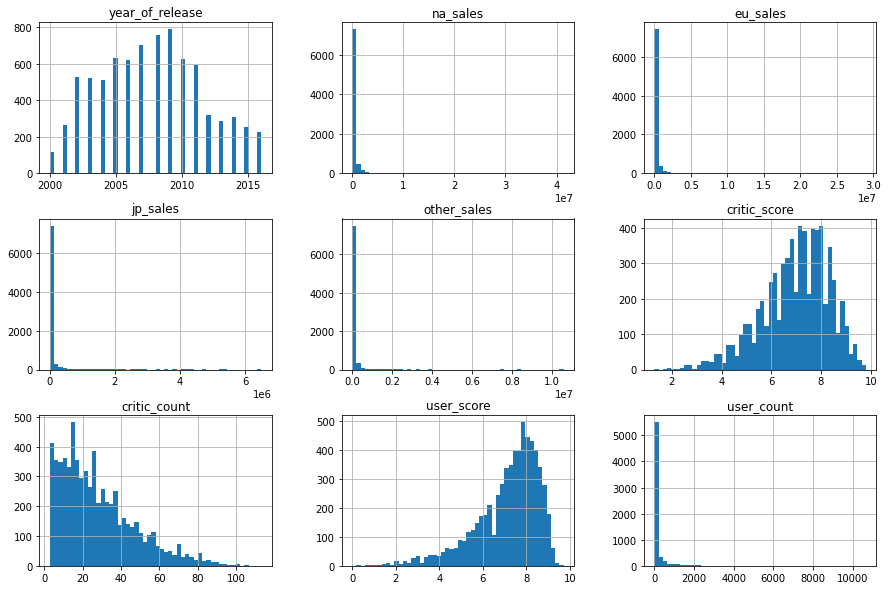

In [59]:
sales.hist(bins=50, figsize=(15,10))

In [54]:
sales[sales["name"] == "pro evolution soccer 2011"] # Duplicates are prevelant but for different platforms 

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,critic_score,critic_count,user_score,user_count,developer,rating
428,pro evolution soccer 2011,PS3,2010,Sports,Konami Digital Entertainment,290000,1170000,540000,410000,7.7,40.0,6.8,85.0,Konami,E
1660,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,50000,300000,290000,160000,7.4,10.0,5.8,5.0,Konami,E
2122,pro evolution soccer 2011,X360,2010,Sports,Konami Digital Entertainment,90000,440000,0,70000,7.9,43.0,5.9,33.0,Konami,E
2971,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,40000,210000,50000,110000,NaN,NaN,6.7,7.0,Konami,E
4366,pro evolution soccer 2011,Weii,2010,Sports,Konami Digital Entertainment,70000,100000,30000,20000,7.8,9.0,5.4,7.0,Konami,E


Text(0.5, 1.0, 'Sales by Region')

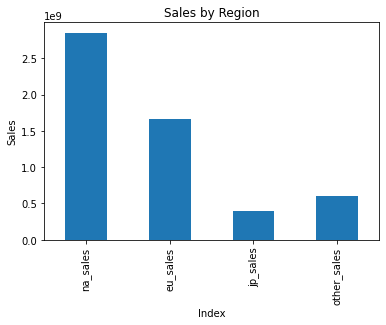

In [79]:
(sales[["na_sales","eu_sales","jp_sales","other_sales"]].sum()).plot(kind="bar")

plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales by Region')

### Converting Sales to Per Capita Sales (100,000)

In [101]:
# From WorldOMeters.com
population_2009 = {
    "NA": 342_231_802,
    "EU": 734_902_805,
    "JP": 128_117_042
}

In [107]:
def transform_sales(data):
    data["na_sales"] = data["na_sales"].apply(lambda x: round(x / (population_2009["NA"] / 100_000),2))
    data["eu_sales"] = data["eu_sales"].apply(lambda x: round(x / (population_2009["EU"] / 100_000),2))
    data["jp_sales"] = data["jp_sales"].apply(lambda x: round(x / (population_2009["JP"] / 100_000),2))

In [108]:
transform_sales(sales)

Text(0.5, 1.0, 'Sales by Region Per 100,000 Population')

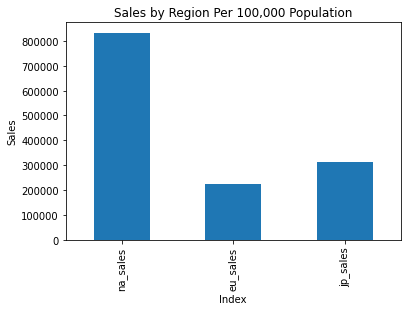

In [119]:
(sales[["na_sales","eu_sales","jp_sales"]].sum()).plot(kind="bar")

plt.xlabel('Index')
plt.ylabel('Sales')
plt.title('Sales by Region Per 100,000 Population')

Regardless of population size NA dominates global sales of video games.

<Axes: >

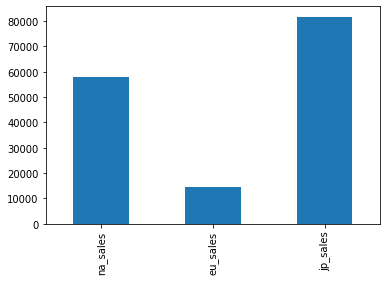

In [118]:
# Global Sales for Role-Playing 
role_playing = sales[sales["genre"] == "Role-Playing"]
role_playing[["na_sales","eu_sales","jp_sales"]].sum().plot(kind="bar")